In [6]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
import numpy as np
import awkward as ak
import os
import pint
import glob
import re
from functools import partial
import itertools
from cycler import cycler

# I use the SiPM QC Analysis kernel (from .venv/bin)

u = pint.get_application_registry()

import lgdo # for impl histbrowser
from lgdo import lh5
from lgdo.lh5 import LH5Store, LH5Iterator, read, read_as, ls, show
from dspeed.vis.waveform_browser import WaveformBrowser
from dspeed.vis import WaveformAndHistBrowser
from legendmeta import LegendMetadata

from latools.utils import get_key_for_rawid, get_detector_system_for_channelname, get_filtered_keys_in_detectorsystem
from latools import core
from latools.browse import BrowseTask, BrowseAnydetTask
from latools.histogram import HistogramTask, Histogram2DTask, CategoricalHistogramTask, CategoricalHistogram2DTask
from latools.counter import CountTask

plt.rcParams["figure.figsize"] = (14, 4)
plt.rcParams["figure.facecolor"] = "white"
plt.rcParams["font.size"] = 14

proj_dir = "/mnt/atlas02/projects/legend/sipm_qc"
lmeta = LegendMetadata(os.path.join(proj_dir, "metadata/legend-metadata-schwarz"))
chmap = lmeta.channelmap("20250624T140504Z")

/mnt/atlas02/projects/legend/sipm_qc/ana/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [7]:
dsp_config_file = os.path.join(proj_dir, "ana/custom_chains/trap_test.yaml")

raw_dir = os.path.join(proj_dir, "data/tier/raw/lac/p14/r006")

raw_examples: list[tuple[str,list[int]]] = []
def add_raw(file, ints): 
    raw_examples.append((os.path.join(raw_dir, file), ints))

def get_example(index: int):
    prod = []
    for f, ixs in raw_examples:
        prod += (list(itertools.product([f], ixs)))
    print(prod)
    return prod[index]

# S015 xtalk from pulser (also S055 has xtalk here but much weaker):
#add_raw("l200-p14-r006-lac-20250624T140504Z-tier_raw.lh5", [217, 541, 900, 1263, 1594, 1922, 2219, 2554, 2898, 3242, 3567, 3921, 4304, 4644, 5001, 5345, 5676, 5986, 6325, 6988, 7298, 7635, 7983, 8309, 8642, 8974, 9326, 9672, 10013])
# S015 bad current due to huge pulse:
add_raw("l200-p14-r006-lac-20250624T140706Z-tier_raw.lh5", [6938, 7826]) # bad current
# S055 false positive for old is_noise
#add_raw("l200-p14-r006-lac-20250624T140504Z-tier_raw.lh5", [1894, 2730, 4218, 5312, 5478, 6596, 7608, 8416])
# S055 strong and tagged noise burst:
#add_raw("l200-p14-r006-lac-20250624T164258Z-tier_raw.lh5", [170])

In [8]:
the_spm="S055/raw"
raw_file, raw_index = get_example(0)

[('/mnt/atlas02/projects/legend/sipm_qc/data/tier/raw/lac/p14/r006/l200-p14-r006-lac-20250624T140706Z-tier_raw.lh5', 6938), ('/mnt/atlas02/projects/legend/sipm_qc/data/tier/raw/lac/p14/r006/l200-p14-r006-lac-20250624T140706Z-tier_raw.lh5', 7826)]


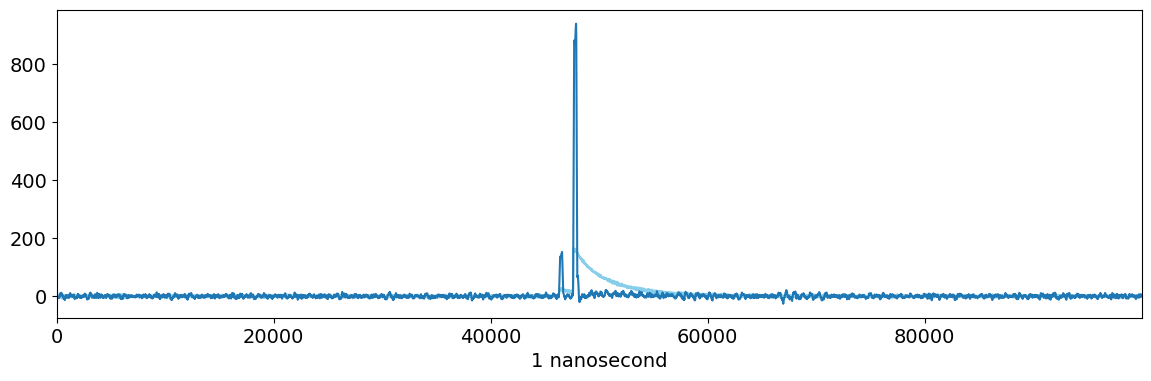

In [9]:
browser = WaveformBrowser(
    raw_file,
    the_spm,
    dsp_config=dsp_config_file,
    lines=["wf_blsub", "trap_pz_wf"],
    styles=[
        #{"color": ["skyblue"], "ls": ["dotted"]},
        {"color": ["skyblue"]},
    ],
    #x_lim=[48*u.us, 54*u.us],
)
browser.draw_entry(raw_index)

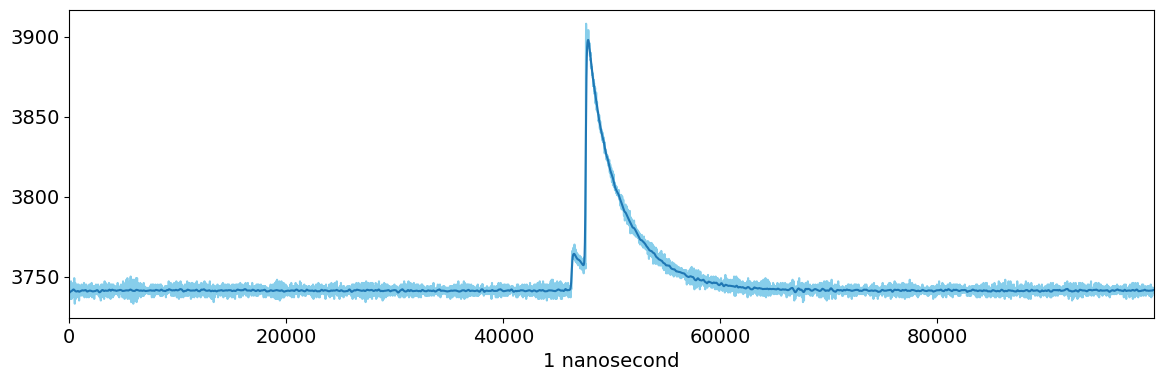

In [10]:
browser = WaveformBrowser(
    raw_file,
    the_spm,
    dsp_config=dsp_config_file,
    lines=["waveform_bit_drop", "wf_gaus"],
    styles=[
        #{"color": ["skyblue"], "ls": ["dotted"]},
        {"color": ["skyblue"]},
    ],
    #x_lim=[48*u.us, 54*u.us],
)
browser.draw_entry(raw_index)

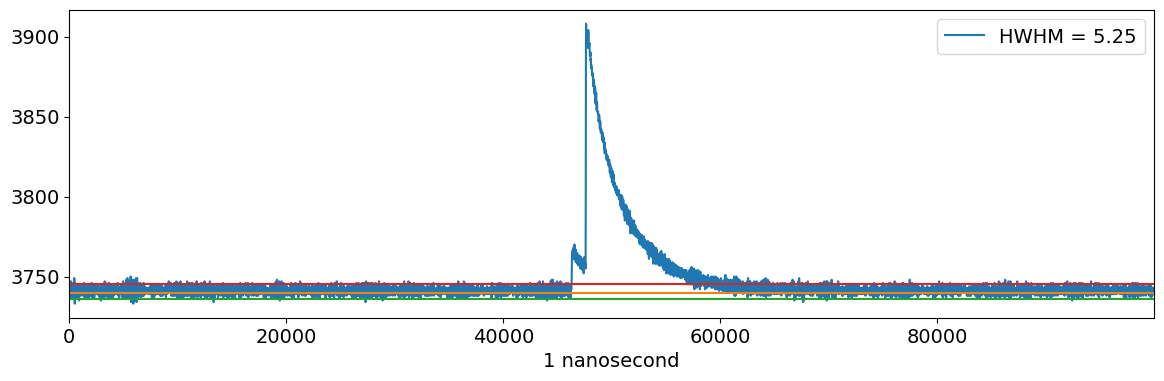

In [11]:
browser = WaveformBrowser(
    raw_file,
    the_spm,
    dsp_config=dsp_config_file,
    lines=["waveform_bit_drop", "wf_mode", "wf_min_small", "wf_fwhm_mode_sum"],
    legend="HWHM = {wf_fwhm}"
    #x_lim=[48*u.us, 54*u.us],
)
browser.draw_entry(raw_index)

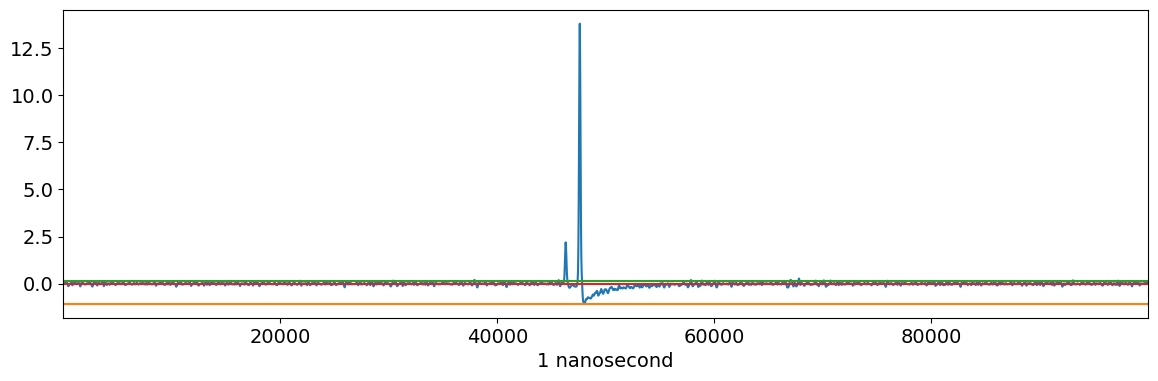

In [12]:
browser = WaveformBrowser(
    raw_file,
    the_spm,
    dsp_config=dsp_config_file,
    lines=["wf_curr", "curr_min_small", "curr_fwhm", "curr_mode"],
    #x_lim=[48*u.us, 54*u.us],
)
browser.draw_entry(raw_index)